***Chapter 4***

Given:
$
X\in\{4,5,6,7,8\},\qquad P(X=x)=\{0.15,0.15,0.25,0.35,0.10\}.
$

Compute \(E[X]\).

In [45]:
import numpy as np
textbooks = [4,5,6,7,8]
textbooks_p = [0.15,0.15,0.25,0.35,0.10]

textbooks = np.array(textbooks)
textbooks_p = np.array(textbooks_p)

mu = np.sum(textbooks * textbooks_p)
mu


np.float64(6.1)

$X\in\{4,6,8\}$ with $P=\{0.5,0.3,0.2\}$.

$g(X)=20+3X+0.5X^2$

Compute $E[g(X)]$.


In [46]:
x = np.array([4,6,8])
p = np.array([0.5,0.3,0.2])
g = 20 + 3*x + 0.5*(x**2)
mu_g = np.sum(g*p)
g, mu_g
# g, mu_g

(array([40., 56., 76.]), np.float64(52.0))


Joint pmf table (rows are \(Y\in\{0,5,10\}\), columns are \(X\in\{0,5,10,15\}\)):

$
\begin{array}{c|cccc}
 & 0 & 5 & 10 & 15 \\\\ \hline
0  & 0.02 & 0.06 & 0.02 & 0.10 \\\\
5  & 0.04 & 0.15 & 0.20 & 0.10 \\\\
10 & 0.01 & 0.15 & 0.14 & 0.01 \\\\
\end{array}
$

Compute \(E[X+Y]\).

In [47]:
X_vals = np.array([0,5,10,15], dtype=float)
Y_vals = np.array([0,5,10], dtype=float)

P = np.array([
    [0.02, 0.06, 0.02, 0.10],
    [0.04, 0.15, 0.20, 0.10],
    [0.01, 0.15, 0.14, 0.01],
], dtype=float)

PX = P.sum(axis=0)  # sum over Y
PY = P.sum(axis=1)  # sum over X

EX = float(np.sum(X_vals * PX))
EY = float(np.sum(Y_vals * PY))
EX_plus_Y = EX + EY

(EX, EY, EX_plus_Y)


(8.55, 5.550000000000001, 14.100000000000001)


Using the textbooks from Example 1, compute \(\mathrm{Var}(X)\).

1.49
1.2206555615733703


Text(0.5, 1.0, 'Distribution of Textbooks')

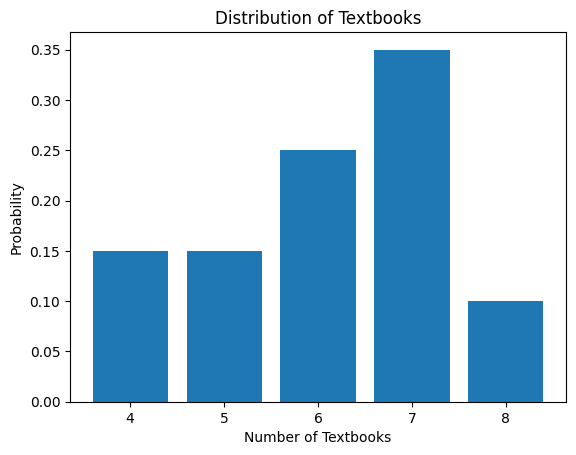

In [48]:
import matplotlib.pyplot as plt

mu = np.sum(textbooks*textbooks_p)
var_textbooks = np.sum((textbooks - mu)**2 * textbooks_p)
print(var_textbooks)

sigma_textbooks = np.sqrt(var_textbooks)
print(sigma_textbooks)
plt.bar(textbooks, textbooks_p)
plt.xlabel("Number of Textbooks")
plt.ylabel("Probability")
plt.title("Distribution of Textbooks")


g(x)

In [49]:
g = np.array((2*textbooks+2))




## Example 10 — Joint pmf: marginals, probability, independence, covariance, correlation

Dinner costs: $X\in\{7,9,10\}$ (man's dinner), $Y\in\{7,9,10\}$ (woman's dinner).

$
\begin{array}{c|ccc}
 & 7 & 9 & 10 \\\\ \hline
7  & 0.05 & 0.05 & 0.10 \\\\
9  & 0.05 & 0.10 & 0.35 \\\\
10 & 0    & 0.20 & 0.10 \\\\
\end{array}
$

Compute:
1) marginals \(P(X=x)\), \(P(Y=y)\)
2) $P(X\le 9, Y\le 9)$
3) test independence
4) covariance \(\sigma_{XY}\) and correlation \(\rho\).


In [50]:
import math
X = np.array([7,9,10])
Y = np.array([7,9,10])

P = np.array([
    [0.05, 0.05, 0.10],
    [0.05, 0.10, 0.35],
    [0.00, 0.20, 0.10]])

PX = P.sum(axis=0)
PY = P.sum(axis=1)
print(PX)
print(PY)

mask_X = X <= 9      # X in {9, 10}
mask_Y = Y <= 9      # Y in {7, 9}

prob = P[np.ix_(mask_Y, mask_X)].sum()


print(P[0:2, 0:2])
print(P[np.ix_(mask_Y, mask_X)])

EX = np.sum(X * PX)
EY = np.sum(Y * PY)

print(EY)
EXY = np.sum((Y[:,None]*X[None,:]) * P)
cov = EXY - EX*EY
print(cov)

VarX = float(np.sum(((X-EX)**2) * PX))
VarY = float(np.sum(((Y-EY)**2) * PY))
sigX, sigY = math.sqrt(VarX), math.sqrt(VarY)


rho = cov/(sigX*sigY)

print(rho)

[0.1  0.35 0.55]
[0.2 0.5 0.3]
[[0.05 0.05]
 [0.05 0.1 ]]
[[0.05 0.05]
 [0.05 0.1 ]]
8.9
0.1349999999999909
0.14214661375529922
